I certify that the code and data in this assignment were generated independently, using only the tools
and resources defined in the course and that I did not receive any external help, coaching or contributions
during the production of this work.

In [ ]:
!pip install gym

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

In [99]:

import pandas as pd

In [15]:
grid = np.zeros((3, 3))
print(grid)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [16]:
pos1 = [0, 0]
pos2 = [2, 2]

grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

print(grid)

[[1.  0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0.5]]


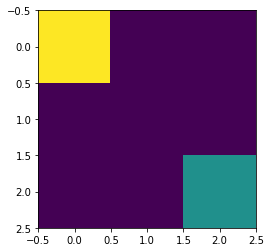

In [20]:
plt.imshow(grid)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

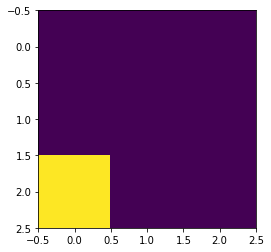

<IPython.core.display.Javascript object>

In [41]:
from google.colab import widgets
import time

# plt.figimage
output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((3, 3))
  grid[np.random.randint(3), np.random.randint(3)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)
  # with output_grid.output_to(0, 0):
  #   output_grid.clear_cell()
  # plt.plot(grid)
  # plt.imshow(grid)
  # # plt.show()
  # time.sleep(1)

In [168]:
#fetching the rewards excel

In [104]:
data = pd.read_excel('env.xlsx')

In [105]:
data

pos  reward
0   (0,0)     0.0
1   (1,0)     0.5
2   (2,0)     1.0
3   (3,0)     1.5
4   (0,1)     0.5
5   (1,1)     1.0
6   (2,1)     1.5
7   (3,1)     2.0
8   (0,2)     1.0
9   (1,2)     1.5
10  (2,2)     2.0
11  (3,2)     2.5
12  (0,3)     1.5
13  (1,3)     2.0
14  (2,3)     2.5
15  (3,3)     3.0

In [134]:
reward_dict = {}
i=0
for j in range(4):
  for k in range(4):
    reward_dict[(k,j)] = data['reward'][i]
    i+=1

In [135]:
reward_dict

{(0, 0): 0.0,
 (0, 1): 0.5,
 (0, 2): 1.0,
 (0, 3): 1.5,
 (1, 0): 0.5,
 (1, 1): 1.0,
 (1, 2): 1.5,
 (1, 3): 2.0,
 (2, 0): 1.0,
 (2, 1): 1.5,
 (2, 2): 2.0,
 (2, 3): 2.5,
 (3, 0): 1.5,
 (3, 1): 2.0,
 (3, 2): 2.5,
 (3, 3): 3.0}

In [127]:
# type(reward_dict.keys()[0])
# (reward_dict.keys())[0]
# for key in reward_dict.keys():
  # print(type(key))

In [161]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  #mode = 0 (deterministic); mode=1 (stochastic)
  def __init__(self, mode=0):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 16
    # self.reward = np.arange(0.0,0.5,0.1)
    self.reward_li = reward_dict
    self.mode = mode
    # self.timestep = 0
    # self.agent_pos = [0, 0]
    # self.goal_pos = [3, 3]
    # self.state = np.zeros((4,4))
    # self.state[tuple(self.agent_pos)] = 1
    # self.state[tuple(self.goal_pos)] = 0.5

  def reset(self):
    self.timestep = 0
    self.agent_pos = [0, 0]
    self.goal_pos = [3, 3]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()
    return observation

  def step(self, action):
    prob = np.random.random()
    # prob = 0.05
    if self.mode==1 and (self.agent_pos[0] == self.agent_pos[1]) and prob<0.10:
      pass
    else:
      if action == 0:
        self.agent_pos[0] += 1
      if action == 1:
        self.agent_pos[0] -= 1
      if action == 2:
        self.agent_pos[1] += 1
      if action == 3:
        self.agent_pos[1] -= 1        
    
    self.agent_pos = np.clip(self.agent_pos, 0, 3)
    # self.agent_pos = np.clip(self.agent_pos, 0, 2)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    # reward = np.random.choice(self.reward)
    # if (self.agent_pos == self.goal_pos).all():
    #   reward = 1
    reward = self.reward_li[tuple(self.agent_pos)]
    # print(reward)

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps or (self.agent_pos == self.goal_pos).all() else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

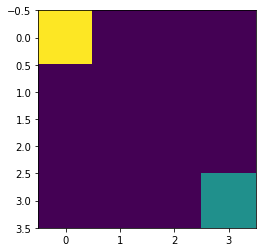

In [62]:
#dummy
env = GridEnvironment()
obs = env.reset()
env.render()

Reward:  0


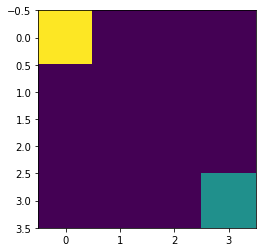

In [63]:
#test
action = 1
observation, reward, done, _ = env.step(action)
env.render()
print('Reward: ', reward)

In [166]:
env = GridEnvironment(mode=0)
obs = env.reset()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reward:  3.0


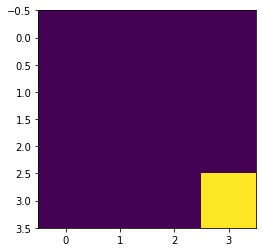

<IPython.core.display.Javascript object>

no of iterations 14


In [167]:
#main action
# selected_action = []
count = 0
obs = env.reset()
output_grid = widgets.Grid(1, 1)
while True:
  count += 1
  # action = np.random.randint(3)
  action = np.random.choice([0,1,2,3])
  # selected_action.append(action)
  observation, reward, done, _ = env.step(action)
  with output_grid.output_to(0,0):
    output_grid.clear_cell()
    env.render()
    print('Reward: ', reward)
  time.sleep(0.4)
  if done:
    break
print("no of iterations", count)
# print(selected_action)

In [ ]:
  #  with output_grid.output_to(0, 0):
  #   output_grid.clear_cell()
  #   plt.imshow(grid)
  # time.sleep(1)
# output_grid = widgets.Grid(1, 1)
# for _ in range(5):
#   grid = np.zeros((3, 3))
#   grid[np.random.randint(3), np.random.randint(3)] = 1
#   with output_grid.output_to(0, 0):
#     output_grid.clear_cell()
#     plt.imshow(grid)
#   time.sleep(1)